In [1]:
######  Import required libraries #########
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import pandas as pd
from pathlib import Path as Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pymannkendall as mk
import numpy as np
from matplotlib import gridspec
import os
import glob
import dataframe_image as dfi
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### Specify Path of data and Assign libraries ####

# Path1=Path('/media/kenz/DISK/Data for publications/')
Path2=Path('/media/kenz/DISK/Data for publications/Data')

########### Read in Rainfall data ############
Yendi_RR =pd.read_fwf(Path2/'Yendi_1960_2020_mmRR_cgf.txt', names=['Year','Month','Rainfall'])
Bole_RR =pd.read_fwf(Path2/'Bole_1960_2020_mmRR_cgf.txt', names=['Year','Month','Rainfall'])
Navrongo_RR =pd.read_fwf(Path2/'Navrongo_1960_2020_mmRR_cgf.txt', names=['Year','Month','Rainfall'])
Tamale_RR =pd.read_fwf(Path2/'Tamale_1960_2020_mmRR_cgf.txt', names=['Year','Month','Rainfall'])
Wa_RR =pd.read_fwf(Path2/'Wa_1960_2020_mmRR_cgf.txt', names=['Year','Month','Rainfall'])
Walewale_RR =pd.read_fwf(Path2/'Walewale_1960_2020_mmRR_cgf.txt', names=['Year','Month','Rainfall'])
Zuarungu_RR =pd.read_fwf(Path2/'Zuarungu_1960_2020_mmRR_cgf.txt', names=['Year','Month','Rainfall'])



########### Read in Temperature Data #############
Yendi_Tx=pd.read_fwf(Path2/'Yendi_1960_2020_mmTx_cgf.txt', names=['Year','Month','Temperature'])
Yendi_Tn=pd.read_fwf(Path2/'Yendi_1960_2020_mmTn_cgf.txt', names=['Year','Month','Temperature'])
Yendi_Tm=pd.read_fwf(Path2/'Yendi_1960_2020_mmTm_cgf.txt', names=['Year','Month','Temperature'])

Bole_Tx=pd.read_fwf(Path2/'Bole_1960_2020_mmTx_cgf.txt', names=['Year','Month','Temperature'])
Bole_Tn=pd.read_fwf(Path2/'Bole_1960_2020_mmTn_cgf.txt', names=['Year','Month','Temperature'])
Bole_Tm=pd.read_fwf(Path2/'Bole_1960_2020_mmTm_cgf.txt', names=['Year','Month','Temperature'])

Navrongo_Tx=pd.read_fwf(Path2/'Navrongo_1960_2020_mmTx_cgf.txt', names=['Year','Month','Temperature'])
Navrongo_Tn=pd.read_fwf(Path2/'Navrongo_1960_2020_mmTn_cgf.txt', names=['Year','Month','Temperature'])
Navrongo_Tm=pd.read_fwf(Path2/'Navrongo_1960_2020_mmTm_cgf.txt', names=['Year','Month','Temperature'])

Tamale_Tx=pd.read_fwf(Path2/'Tamale_1960_2020_mmTx_cgf.txt', names=['Year','Month','Temperature'])
Tamale_Tn=pd.read_fwf(Path2/'Tamale_1960_2020_mmTn_cgf.txt', names=['Year','Month','Temperature'])
Tamale_Tm=pd.read_fwf(Path2/'Tamale_1960_2020_mmTm_cgf.txt', names=['Year','Month','Temperature'])

Wa_Tx=pd.read_fwf(Path2/'Wa_1960_2020_mmTx_cgf.txt', names=['Year','Month','Temperature'])
Wa_Tn=pd.read_fwf(Path2/'Wa_1960_2020_mmTn_cgf.txt', names=['Year','Month','Temperature'])
Wa_Tm=pd.read_fwf(Path2/'Wa_1960_2020_mmTm_cgf.txt', names=['Year','Month','Temperature'])

Walewale_Tx=pd.read_fwf(Path2/'Walewale_1960_2020_mmTx_cgf.txt', names=['Year','Month','Temperature'])
Walewale_Tn=pd.read_fwf(Path2/'Walewale_1960_2020_mmTn_cgf.txt', names=['Year','Month','Temperature'])
Walewale_Tm=pd.read_fwf(Path2/'Walewale_1960_2020_mmTm_cgf.txt', names=['Year','Month','Temperature'])

Zuarungu_Tx=pd.read_fwf(Path2/'Zuarungu_1960_2020_mmTx_cgf.txt', names=['Year','Month','Temperature'])
Zuarungu_Tn=pd.read_fwf(Path2/'Zuarungu_1960_2020_mmTn_cgf.txt', names=['Year','Month','Temperature'])
Zuarungu_Tm=pd.read_fwf(Path2/'Zuarungu_1960_2020_mmTm_cgf.txt', names=['Year','Month','Temperature'])


### Study Area

#### Specifying Borders

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

crs = ccrs.PlateCarree()

import itertools
import matplotlib.patheffects as pe
import numpy as np

def add_zebra_frame(ax, lw=4, crs="pcarree", zorder=None):

    ax.spines["geo"].set_visible(False)
    left, right, bot, top = ax.get_extent()
    
    # Alternate black and white line segments
    bws = itertools.cycle(["k", "white"])

    xticks = sorted([left, *ax.get_xticks(), right])
    xticks = np.unique(np.array(xticks))
    yticks = sorted([bot, *ax.get_yticks(), top])
    yticks = np.unique(np.array(yticks))
    for ticks, which in zip([xticks, yticks], ["lon", "lat"]):
        for idx, (start, end) in enumerate(zip(ticks, ticks[1:])):
            bw = next(bws)
            if which == "lon":
                xs = [[start, end], [start, end]]
                ys = [[bot, bot], [top, top]]
            else:
                xs = [[left, left], [right, right]]
                ys = [[start, end], [start, end]]

            # For first and lastlines, used the "projecting" effect
            capstyle = "butt" if idx not in (0, len(ticks) - 2) else "projecting"
            for (xx, yy) in zip(xs, ys):
                ax.plot(
                    xx,
                    yy,
                    color=bw,
                    linewidth=lw,
                    clip_on=False,
                    transform=crs,
                    zorder=zorder,
                    solid_capstyle=capstyle,
                    # Add a black border to accentuate white segments
                    path_effects=[
                        pe.Stroke(linewidth=lw + 1, foreground="black"),
                        pe.Normal(),
                    ],
                )


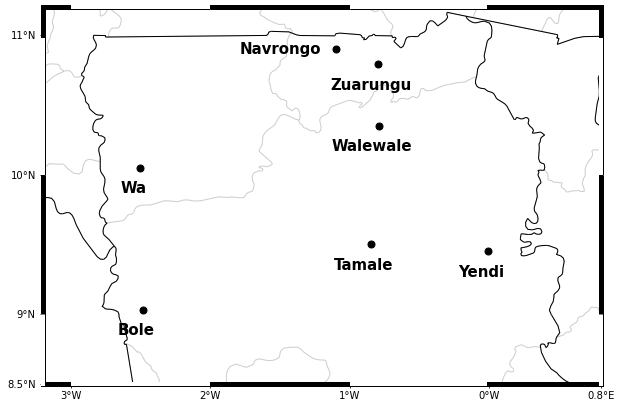

In [4]:
 ################## Reading data for Stations  ###############
    
dat = pd.read_fwf(Path2/'GMet_location_avgSI.txt', names = ['Station', 'Longitude', 'Latitude', 'St'])  ###

#####################  Plot for  study Area ###########################
plt.figure(figsize=(10,9))                         ###### Specifying the size of the figure
ax = plt.axes(projection = ccrs.PlateCarree())       ###### Specifying the type of geopatial plot
ax.add_feature(cf.COASTLINE,alpha=0.8)             
ax.add_feature(cf.BORDERS)
#ax.add_feature(cf.LAND)
ax.set_extent([-3.2,0.8,11.2,9.5])                   #### setting the map boundaries
#ax.stock_img()
ax.add_feature(cf.STATES, alpha= 0.1)               ####  adding territorial boundaries

ax.plot(dat.Longitude,                            
        dat.Latitude, 
        'ro',                                       ##### plotting the longitudes and latitudes of the station
        ms=7, 
        color = 'k')#,
        #transform=ccrs.Geodetic(),label='Synoptic stations')  

s_stations = np.asarray(dat.Station)
                          
for longitude, latitude, name in zip(dat.Longitude, dat.Latitude, s_stations):
    if name in ['Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']:
        ax.text(longitude - .05, latitude - .15, 
                name, 
                va='center',
                ha='center', transform=ccrs.Geodetic(), fontweight='bold',fontsize = '15')
    if name in ['Navrongo']:
        ax.text(longitude - 0.4, latitude, 
                name, 
                va='center',
                ha='center', transform=ccrs.Geodetic(), fontweight='bold',fontsize = '15')
#     else:    
#         ax.text(longitude + .05, latitude + .12, 
#                 name, 
#                 va='center',
#                 ha='center', transform=ccrs.Geodetic(), fontweight='bold',fontsize = '10')


ax.set_xticks([-3,-2.0,-1.0,0,0.8], crs=ccrs.PlateCarree())
ax.set_yticks([11,10,9,8.5], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
add_zebra_frame(ax, lw=4, crs=crs)


# #plt.savefig('Synoptic Stations.pdf',bbox_inches = 'tight')
# plt.savefig('Graphs/graphs/Study_Area.JPEG',bbox_inches = 'tight')

In [2]:
# Define relative path to folder containing the text files
# ###Path2=Path('/media/kenz/DISK/Data for publications/Data')
import os, glob
files_folder = "/media/kenz/DISK/Data for publications/stephen_DClimdata"
files = []

# Create a dataframe list by using a list comprehensioncc

files = [pd.read_fwf(file, 
                     names=['Year','Month','Rainfall'] ) for file in glob.glob(os.path.join(files_folder ,"*dTx_sgf.txt"))]


In [3]:
files

[      Year  Month  Rainfall
 1960     1      1     32.80
 1960     1      2     31.70
 1960     1      3     32.80
 1960     1      4     33.90
 1960     1      5     35.00
 ...    ...    ...       ...
 2020    12     27     33.31
 2020    12     28     33.65
 2020    12     29     33.24
 2020    12     30     34.71
 2020    12     31     35.05
 
 [22281 rows x 3 columns],
       Year  Month  Rainfall
 1960     1      1     32.20
 1960     1      2     32.20
 1960     1      3     32.80
 1960     1      4     33.30
 1960     1      5     34.40
 ...    ...    ...       ...
 2020    12     27     33.45
 2020    12     28     33.85
 2020    12     29     33.07
 2020    12     30     34.79
 2020    12     31     35.22
 
 [22281 rows x 3 columns],
       Year  Month  Rainfall
 1960     1      1     32.98
 1960     1      2     32.60
 1960     1      3     33.64
 1960     1      4     34.68
 1960     1      5     36.04
 ...    ...    ...       ...
 2020    12     27     34.03
 2020    12   

In [5]:
Navrongo_sgf = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Navrongo_1960_2020_dRR_sgf.txt", names = ['Year', 'Month','Day','RR'])
Zuarungu_sgf = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Zuarungu_1960_2020_dRR_sgf.txt", names = ['Year', 'Month','Day','RR'])
Walewale_sgf = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Walewale_1960_2020_dRR_sgf.txt", names = ['Year', 'Month','Day','RR'])
Wa_sgf = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Wa_1960_2020_dRR_sgf.txt", names = ['Year', 'Month','Day','RR'])
Tamale_sgf = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Tamale_1960_2020_dRR_sgf.txt", names = ['Year', 'Month','Day','RR'])
Yendi_sgf = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Yendi_1960_2020_dRR_sgf.txt", names = ['Year', 'Month','Day','RR'])
Bole_sgf = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Bole_1960_2020_dRR_sgf.txt", names = ['Year', 'Month','Day','RR'])

Navrongo__sgf_tx = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Navrongo_1960_2020_dTx_sgf.txt", names = ['Year', 'Month','Day','TX'])
Zuarungu_sgf_tx = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Zuarungu_1960_2020_dTx_sgf.txt", names = ['Year', 'Month','Day','TX'])
Walewale_sgf_tx = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Walewale_1960_2020_dTx_sgf.txt", names = ['Year', 'Month','Day','TX'])
Wa_sgf_tx = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Wa_1960_2020_dTx_sgf.txt", names = ['Year', 'Month','Day','TX'])
Tamale_sgf_tx = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Tamale_1960_2020_dTx_sgf.txt", names = ['Year', 'Month','Day','TX'])
Yendi_sgf_tx = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Yendi_1960_2020_dTx_sgf.txt", names = ['Year', 'Month','Day','TX'])
Bole_sgf_tx = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Bole_1960_2020_dTx_sgf.txt", names = ['Year', 'Month','Day','TX'])

Navrongo__sgf_tn = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Navrongo_1960_2020_dTn_sgf.txt", names = ['Year', 'Month','Day','TN'])
Zuarungu_sgf_tn = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Zuarungu_1960_2020_dTn_sgf.txt", names = ['Year', 'Month','Day','TN'])
Walewale_sgf_tn = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Walewale_1960_2020_dTn_sgf.txt", names = ['Year', 'Month','Day','TN'])
Wa_sgf_tn = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Wa_1960_2020_dTn_sgf.txt", names = ['Year', 'Month','Day','TN'])
Tamale_sgf_tn = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Tamale_1960_2020_dTn_sgf.txt", names = ['Year', 'Month','Day','TN'])
Yendi_sgf_tn = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Yendi_1960_2020_dTn_sgf.txt", names = ['Year', 'Month','Day','TN'])
Bole_sgf_tn = pd.read_fwf("/media/kenz/DISK/Data for publications/stephen_DClimdata/Bole_1960_2020_dTn_sgf.txt", names = ['Year', 'Month','Day','TN'])


In [ ]:
#file1.query('TX == 9.9').count()

In [ ]:
def per_data(x,z):
    return 100 - round((len(x[x[z] == 9.9])/len(x))*100,2)

In [ ]:
per_data(file1, 'RR')

In [ ]:
data = {'RR' : [per_data(Navrongo_sgf,'RR'), per_data(Zuarungu_sgf,'RR'), per_data(Walewale_sgf,'RR'), per_data(Wa_sgf,'RR'), per_data(Tamale_sgf,'RR'), per_data(Yendi_sgf,'RR'), per_data(Bole_sgf,'RR')],
        'TX' : [per_data(Navrongo__sgf_tx,'TX'), per_data(Zuarungu_sgf_tx,'TX'), per_data(Walewale_sgf_tx,'TX'), per_data(Walewale_sgf_tx,'TX'), per_data(Tamale_sgf_tx,'TX'), per_data(Yendi_sgf_tx,'TX'), per_data(Bole_sgf_tx,'TX')],
        'TN' : [per_data(Navrongo__sgf_tn,'TN'), per_data(Zuarungu_sgf_tn,'TN'), per_data(Walewale_sgf_tn,'TN'), per_data(Wa_sgf_tn,'TN'),per_data(Tamale_sgf_tn,'TN') ,per_data(Yendi_sgf_tn,'TN'), per_data(Bole_sgf_tn,'TN')],
}
ind = ['Navrongo','Zuarungu','Walewale','Wa','Tamale','Yendi','Bole']

In [ ]:
pd.DataFrame(data, index=ind)

#### Converting sgf data into Rclimdex Format ####

In [4]:
def Rcli_data(RR,TX,TN):
    RR.loc[RR['RR'] == 9.9, 'RR']= -99.9
    TX.loc[TX['TX'] == 9.9, 'TX']= -99.9
    TN.loc[TN['TN'] == 9.9, 'TN']= -99.9
    data = pd.DataFrame(RR)
    data['TX'] = TX['TX']
    data['TN'] = TN['TN']
    Station = data
    return Station.to_csv('/media/kenz/DISK/Data for publications/Rclim_data/' + str(input()) +'.txt', sep=' ', index=False, header=False)

In [39]:
# Rcli_data(Zuarungu_RR,Zuarungu_Tx,Zuarungu_Tn)

In [7]:
Rcli_data(Walewale, Walewale_sgf_tx, Walewale_sgf_tn)

 Walewale


In [8]:
Rcli_data(Tamale_sgf, Tamale_sgf_tx, Tamale_sgf_tn)

 Tamale


In [11]:
Rcli_data(Wa_sgf, Wa_sgf_tx, Wa_sgf_tn)

 Wa


In [12]:
Rcli_data(Bole_sgf, Bole_sgf_tx, Bole_sgf_tn)

 Bole


In [13]:
Rcli_data(Yendi_sgf, Yendi_sgf_tx, Yendi_sgf_tn)

 Yendi


In [40]:
Rcli_data(Navrongo_sgf, Navrongo__sgf_tx, Navrongo__sgf_tn)

 Navrongo


#### Monthly Rainfall Values

In [ ]:
#### define a funtion to pivot the data. #####################

def heatmap_pivot(x,R,index,column):
    pivot=pd.pivot_table(x, values= R, index=index, columns=column)
    return(pivot)
    
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
fig.delaxes(axes[3][1])
RR_all=[Navorngo_RR, Zuarungu_RR, Walewale_RR, Wa_RR, Bole_RR, Tamale_RR, Yendi_RR]
RR_all_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']
labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']

for i in range(len(RR_all)):
    sns.heatmap(heatmap_pivot(RR_all[i], 'Rainfall', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm', vmax=450, 
                cbar_ax=cbar_ax, cbar_kws={'label': 'Monthly Rainfall [ mm / month]', 'orientation': 'horizontal'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(RR_all_l[i])
plt.suptitle('Monthly Rainfall 1980-2020', fontsize=20)
fig.tight_layout()
plt.savefig('Graphs/graphs/Monthly Rainfall.JPEG')

#### Coefficient of Variation

In [ ]:
def Cof_V(a):
    CV=pd.DataFrame()
    RR_data= a.groupby('Month').mean('rainfall')
    std_cv=np.std(a.Rainfall)
    # g=f'{Yendi_RR=}'.split('=')[0]+' CV'
    CV['CV']=std_cv/RR_data['Rainfall']
    # CV.append(pt)
    return(CV)

# def Cof_V2(a):
#     CV1=pd.DataFrame()
#     RR = a.loc[0:371,:]
#     RR_data= RR.groupby('Month').mean('rainfall')
#     std_cv=np.std(RR.Rainfall)
#     # g=f'{Yendi_RR=}'.split('=')[0]+' CV'
#     CV1['CV']=std_cv/RR_data['Rainfall']
#     # CV.append(pt)
#     return(CV1)

# def Cof_V3(a):
#     CV2=pd.DataFrame()
#     RR = a.loc[372:,:]
#     RR_data= RR.groupby('Month').mean('rainfall')
#     std_cv=np.std(RR.Rainfall)
#     # g=f'{Yendi_RR=}'.split('=')[0]+' CV'
#     CV2['CV']=std_cv/RR_data['Rainfall']
#     # CV.append(pt)
#     return(CV2)

li=[]
for i in range(len(RR_all)):
    vv=Cof_V(RR_all[i])
    li.append(vv)

l=pd.DataFrame(li[0])
l['Zuarungu']=li[1]
l['Walewale']=li[2]
l['Wa']=li[3]
l['Bole']=li[4]
l['Tamale']=li[5]
l['Yendi']=li[6]
CV_list=l.rename(columns={'CV':'Navrongo'})
# columns=[('', 'Navrongo'), ('', 'Zuarungu'), 
#          ('', 'Walewale'), 
#          ('','Wa' ), ('', 'Bole'), 
#          ('', 'Tamale'), ('', 'Yendi')] 
# CV_list.columns = pd.MultiIndex.from_tuples(columns)
CV_list

In [ ]:
# li2=[]
# for i in range(len(RR_all)):
#     vv=Cof_V2(RR_all[i])
#     li2.append(vv)

# l2=pd.DataFrame(li2[0])
# l2['Zuarungu']=li2[1]
# l2['Walewale']=li2[2]
# l2['Wa']=li2[3]
# l2['Bole']=li2[4]
# l2['Tamale']=li2[5]
# l2['Yendi']=li2[6]
# CV_list2=l2.rename(columns={'CV':'Navrongo'})
# # columns=[('1960-1990', 'Navrongo'), 
# #          ('', 'Zuarungu'), 
# #          ('', 'Walewale'), 
# #          ('','Wa' ), 
# #          ('', 'Bole'), 
# #          ('', 'Tamale'), 
# #          ('', 'Yendi')] 
# # CV_list2.columns = pd.MultiIndex.from_tuples(columns)
# # # CV_list2

In [ ]:
# li3=[]
# for i in range(len(RR_all)):
#     vv=Cof_V3(RR_all[i])
#     li3.append(vv)

# l3=pd.DataFrame(li3[0])
# l3['Zuarungu']=li3[1]
# l3['Walewale']=li3[2]
# l3['Wa']=li3[3]
# l3['Bole']=li3[4]
# l3['Tamale']=li3[5]
# l3['Yendi']=li3[6]
# CV_list3=l3.rename(columns={'CV':'Navrongo'})
# # columns=[('1990_2020', 'Navrongo'), ('', 'Zuarungu'), 
# #          ('', 'Walewale'), 
# #          ('','Wa' ), 
# #          ('', 'Bole'), 
# #          ('', 'Tamale'), ('', 'Yendi')] 
# # CV_list3.columns = pd.MultiIndex.from_tuples(columns)
# # # CV_list3

In [ ]:
# df_styled = CV_list.style.background_gradient() #adding a gradient based on values in cell
dfi.export(CV_list,"Graphs/graphs/CV_1960-2020.jpeg", table_conversion='matplotlib')

In [ ]:
# # df_styled = CV_list2.style.background_gradient() #adding a gradient based on values in cell
# dfi.export(CV_list2,"Graphs/CV_1960-1990.jpeg", table_conversion='matplotlib')


In [ ]:
# # df_styled = CV_list3.style.background_gradient() #adding a gradient based on values in cell
# dfi.export(CV_list3,"Graphs/CV_1990-2020.jpeg", table_conversion='matplotlib')

##### SRA Function

In [5]:
def SRA(y):
    RR = y.Rainfall
    RR_df = pd.DataFrame(RR)
    RR_df['date']=pd.date_range(start='1980-01-01', end='2020-12-31',freq='M')
    RR_df=RR_df.set_index('date')
    R=RR_df.sub(RR_df.groupby([RR_df.index.month]).transform('mean'))
    std=RR_df.groupby([RR_df.index.month]).transform(np.std)
    return(R/std)
def SAI(y):
    RR = y.Temperature
    RR_df = pd.DataFrame(RR)
    RR_df['date']=pd.date_range(start='1980-01-01', end='2020-12-31',freq='M')
    RR_df=RR_df.set_index('date')
    R=RR_df.sub(RR_df.groupby([RR_df.index.month]).transform('mean'))
    std=RR_df.groupby([RR_df.index.month]).transform(np.std)
    return(R/std)
# .groupby([an_tmpmin_df.index.month, an_tmpmin_df.index.month]).transform('mean'))
def SRAA(X):
    RR = X.Rainfall
    RR_df = pd.DataFrame(RR)
    RR_df['date']=pd.date_range(start='1980-01-01', freq='M', periods=len(X))
    RR_df=RR_df.set_index('date')
    R=RR_df.sub(RR_df.groupby([RR_df.index.month]).transform('mean'))
    std=RR_df.groupby([RR_df.index.month]).transform(np.std)
    tt=R.Rainfall/std.Rainfall
    tt=pd.DataFrame(tt)
    tt=tt.reset_index()
    tt['Month']=X.Month
    tt['Year']=X.Year
    return(tt)

In [ ]:
    
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
fig.delaxes(axes[3][1])
RR_all=[Navrongo_RR, Zuarungu_RR, Walewale_RR, Wa_RR, Bole_RR, Tamale_RR, Yendi_RR]
RR_all_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']
labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']

for i in range(len(RR_all)):
    sns.heatmap(heatmap_pivot(SRAA(RR_all[i]), 'Rainfall', 
                SRAA(RR_all[i]).Month, SRAA(RR_all[i]).Year),
                ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                cbar_kws={'label': ' Standard Rainfall Anomaly Index [ SRAI ]', 'orientation': 'horizontal'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(RR_all_l[i])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Month')
    plt.suptitle('Standard Rainfall Anomaly', fontsize=17)
fig.tight_layout()
# plt.savefig('Graphs/graphs/Standard Rainfall Anomaly.JPEG')

In [18]:
nav=SRAA(Navrongo_RR)
nav

,date,Rainfall,Month,Year
0,1980-01-31,-0.206428,1,1980
1,1980-02-29,-0.393272,2,1980
2,1980-03-31,-0.561914,3,1980
3,1980-04-30,0.589095,4,1980
4,1980-05-31,-0.133168,5,1980
...,...,...,...,...
487,2020-08-31,-0.429394,8,2020
488,2020-09-30,1.404779,9,2020
489,2020-10-31,0.652371,10,2020
490,2020-11-30,-0.405412,11,2020


In [17]:
nav=nav.set_index(nav.Year)
nav

,date,Rainfall,Month,Year
Year,,,,
1980,1980-01-31,-0.206428,1,1980
1980,1980-02-29,-0.393272,2,1980
1980,1980-03-31,-0.561914,3,1980
1980,1980-04-30,0.589095,4,1980
1980,1980-05-31,-0.133168,5,1980
...,...,...,...,...
2020,2020-08-31,-0.429394,8,2020
2020,2020-09-30,1.404779,9,2020
2020,2020-10-31,0.652371,10,2020


KeyError: 'Column not found: 1'

### Monthly Temperature Values

#### Maximunm Temperature

In [ ]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
fig.delaxes(axes[3][1])

Tmax=[Navrongo_Tx, Zuarungu_Tx, Walewale_Tx, Wa_Tx, Bole_Tx, Tamale_Tx, Yendi_Tx]
Tmax_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']

for i in range(len(RR_all)):
    sns.heatmap(heatmap_pivot(Tmax[i], 'Temperature', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
                cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'horizontal'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(Tmax_l[i])
plt.suptitle('Monthly Maximum Temperature 1980-2020', fontsize=17)
fig.tight_layout()
plt.savefig('Graphs/graphs/Monthly Maximum Temperature.JPEG')

#### Monthly Minimum Temperature

In [ ]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
fig.delaxes(axes[3][1])

Tmin=[Navrongo_Tn, Zuarungu_Tn, Walewale_Tx, Wa_Tn, Bole_Tn, Tamale_Tn, Yendi_Tn]
Tmin_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']

for i in range(len(RR_all)):
    sns.heatmap(heatmap_pivot(Tmin[i], 'Temperature', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
                cbar_ax=cbar_ax, cbar_kws={'label': ' Temperature [ $^o$C ]', 'orientation': 'horizontal'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(Tmin_l[i])
plt.suptitle('Monthly Minimum Temperature 1980-2020', fontsize=17)
fig.tight_layout()
plt.savefig('Graphs/graphs/Monthly Minimum Temperature.JPEG')

#### Monthly Mean Temperature

In [ ]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
fig.delaxes(axes[3][1])

Tmean=[Navrongo_Tm, Zuarungu_Tm, Walewale_Tm, Wa_Tm, Bole_Tm, Tamale_Tm, Yendi_Tm]
Tmean_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']

for i in range(len(RR_all)):
    sns.heatmap(heatmap_pivot(Tmean[i], 'Temperature', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
                cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'horizontal'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(Tmean_l[i])
plt.suptitle('Monthly Mean Temperature 1980-2020', fontsize=17)
fig.tight_layout()
plt.savefig('Graphs/graphs/Monthly Mean Temperature.JPEG')

#### SAI

#### SAI for Maximum Temperature

In [ ]:
    
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
fig.delaxes(axes[3][1])
Tmax=[Navrongo_Tx, Zuarungu_Tx, Walewale_Tx, Wa_Tx, Bole_Tx, Tamale_Tx, Yendi_Tx]
Tmax_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']


for i in range(len(RR_all)):
    sns.heatmap(heatmap_pivot(SAI(Tmax[i]), 'Temperature', 
                SAI(Tmax[i]).index.month, SAI(Tmax[i]).index.year), 
                ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                cbar_kws={'label': ' SAI ', 'orientation': 'horizontal'})

    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(Tmax_l[i])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Month')
    plt.suptitle('SAI Maximum Temperatures 1980-2020', fontsize=17)
fig.tight_layout()
plt.savefig('Graphs/graphs/Standard Anomaly for Maximum Temperature.JPEG')

In [ ]:
    
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
fig.delaxes(axes[3][1])
Tmin=[Navrongo_Tn, Zuarungu_Tn, Walewale_Tn, Wa_Tn, Bole_Tn, Tamale_Tn, Yendi_Tn]
Tmin_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']


for i in range(len(Tmin)):
    sns.heatmap(heatmap_pivot(SAI(Tmin[i]), 'Temperature', 
                SAI(Tmin[i]).index.month, SAI(Tmin[i]).index.year), 
                ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                cbar_kws={'label': ' SAI C', 'orientation': 'horizontal'})

    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(Tmin_l[i])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Month')
    plt.suptitle('SAI Minimum Temperatures 1980-2020', fontsize=17)
fig.tight_layout()
plt.savefig('Graphs/graphs/Standard Anomaly for Minimum Temperature.JPEG')

In [ ]:
    
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
fig.delaxes(axes[3][1])
Tmean=[Navrongo_Tm, Zuarungu_Tm, Walewale_Tm, Wa_Tm, Bole_Tm, Tamale_Tm, Yendi_Tm]
Tmean_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']


for i in range(len(Tmean)):
    sns.heatmap(heatmap_pivot(SAI(Tmean[i]), 'Temperature', 
                SAI(Tmean[i]).index.month, SAI(Tmean[i]).index.year), 
                ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                cbar_kws={'label': ' SAI ', 'orientation': 'horizontal'})

    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(Tmean_l[i])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Month')
    plt.suptitle('SAI Mean Temperatures 1980-2020', fontsize=20)
fig.tight_layout()
plt.savefig('Graphs/graphs/Standard Anomaly for Mean Temperature.JPEG')

,Year,Month,Day,RR,TX,TN
0,1960,1,1,0.0,33.47,18.00
1,1960,1,2,0.0,32.83,18.12
2,1960,1,3,0.0,33.69,18.03
3,1960,1,4,0.0,34.08,18.04
4,1960,1,5,0.0,35.35,19.02
...,...,...,...,...,...,...
22276,2020,12,27,0.0,34.86,20.38
22277,2020,12,28,0.0,34.59,20.34
22278,2020,12,29,0.0,34.43,20.11
22279,2020,12,30,0.0,35.41,19.64


In [ ]:
def Rcli_data(RR,TX,TN):
    RR.loc[RR['RR'] == 9.9, 'RR']= -99.9
    TX.loc[TX['TX'] == 9.9, 'TX']= -99.9
    TN.loc[TN['TN'] == 9.9, 'TN']= -99.9
    data = pd.DataFrame(RR)
    data['TX'] = TX['TX']
    data['TN'] = TN['TN']
    Station = data
    return Station.to_csv('/media/kenz/DISK/Data for publications/Rclim_data/' + str(input()) +'.txt', sep=' ', index=False, header=False)

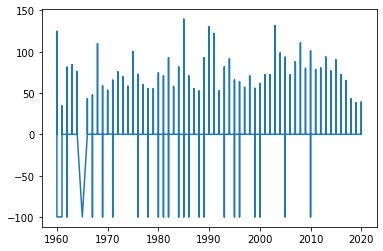

In [25]:
import matplotlib.pyplot as plt
plt.plot(Bole_sgf.Year, Bole_sgf.RR)

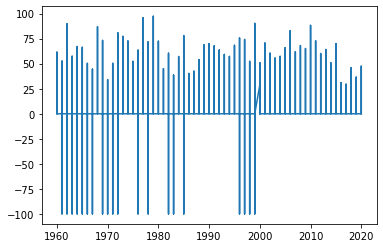

In [38]:
plt.plot(Wa_sgf.Year, Wa_sgf.RR)

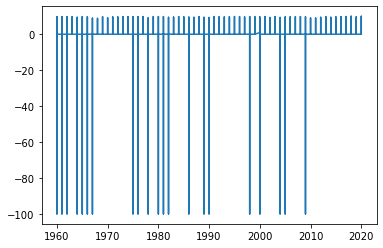

In [41]:
plt.plot(Navrongo_sgf.Year, Navrongo_sgf.RR)

In [44]:
Navrongo_sgf.max()

Year     2020.00
Month      12.00
Day        31.00
RR          9.99
dtype: float64